In [3]:
from experiments.building_on_mit.emb_space.emb_space import run_tsi_experiment, display_embeddings, display_train_and_test_embs
from torch_geometric.utils import to_dense_batch
import matplotlib.pyplot as plt
from ts_vae.utils import remove_files

# if want to run name == main in notebook, cell with just following line
# %run -i experiments/building_on_mit/emb_space
remove_files()

Files removed.


Starting TS interpolation experiment...
===== Testing epoch: 005, Loss: 5.6845 =====
===== Testing epoch: 010, Loss: 4.5238 =====
Completed experiment, use the experiment log to print results.


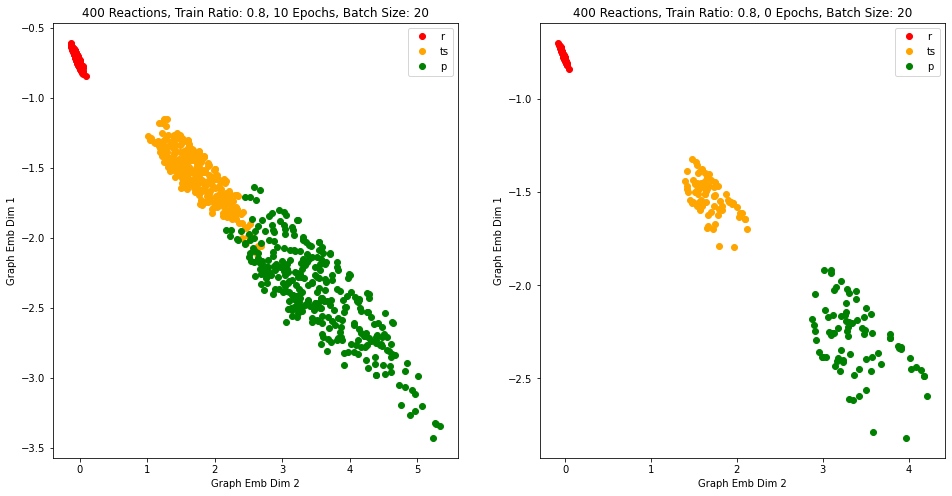

In [3]:
### keep for initial test
exp_log, test_log = run_tsi_experiment(train_ratio = 0.8, batch_size = 20, epochs = 10, test_interval = 5)
display_train_and_test_embs(exp_log, test_log)

# fig, ax = plt.subplots(figsize = (8, 8))
# e_fig, e_ax = display_embeddings(exp_log, fig, ax)
# t_fig, t_ax = display_embeddings(test_log)
plt.savefig(f'experiments/building_on_mit/emb_space/figs/traintest.png')

Starting TS interpolation experiment...
===== Testing epoch: 010, Loss: 0.9889 =====
===== Testing epoch: 020, Loss: 0.6449 =====
Completed experiment, use the experiment log to print results.
Starting TS interpolation experiment...
===== Testing epoch: 010, Loss: 1.0115 =====
===== Testing epoch: 020, Loss: 0.7245 =====
Completed experiment, use the experiment log to print results.


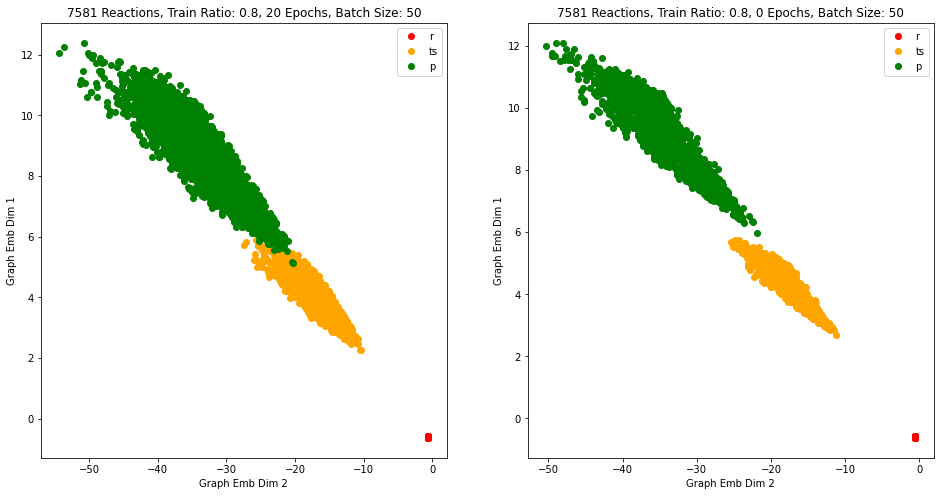

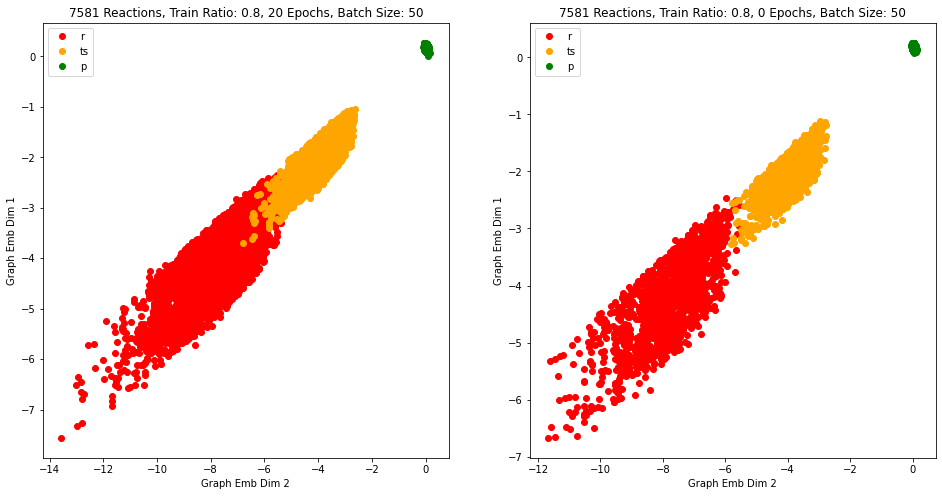

In [5]:
# modifying batch sizes
# exp_params = [(0.8, 50, 20), (0.8, 100, 20), (0.8, 150, 20)], took 30 mins! longer for bigger batches weirdly

exp_params = [(0.8, 50, 20), (0.8, 50, 20)]

for i, (t_ratio, b_size, epochs) in enumerate(exp_params):
    train_log, test_log = run_tsi_experiment(t_ratio, b_size, epochs)
    fig, axs = display_train_and_test_embs(train_log, test_log)
    file_name = f"tr{t_ratio}_bs{b_size}_e{epochs}"
    plt.savefig(f'experiments/building_on_mit/emb_space/figs/traintest2/{i}.png')

In [1]:
from experiments.building_on_mit.emb_space.redo import tsi_main, display_train_and_test_embs
# from ts_vae.utils import remove_files
# remove_files()
train_log, test_log = tsi_main(tt_split = 0.8, batch_size = 20, epochs = 10, test_interval = 5)

Starting TS interpolation experiment...
Completed experiment, use the experiment log to print results.


(<Figure size 1152x576 with 2 Axes>,
 array([<AxesSubplot:title={'center':'200 Reactions, Train Ratio: 0.8, 10 Epochs, Batch Size: 20'}, xlabel='Graph Emb Dim 2', ylabel='Graph Emb Dim 1'>,
        <AxesSubplot:title={'center':'200 Reactions, Train Ratio: 0.8, 2 Epochs, Batch Size: 20'}, xlabel='Graph Emb Dim 2', ylabel='Graph Emb Dim 1'>],
       dtype=object))

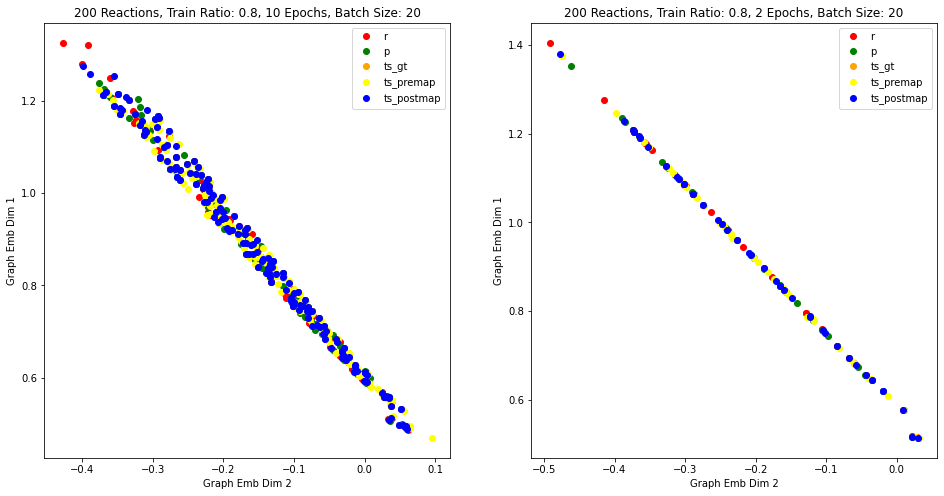

In [7]:
which_to_print = {'r': True, 'p': True, 'ts_gt': False, 'ts_premap': True, 'ts_postmap': True}
display_train_and_test_embs(train_log, test_log, which_to_print)